#Telecom X parte 2

---
#🛠️ Preparación de los Datos

##Extracción del Archivo Tratado

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
url = 'https://raw.githubusercontent.com/MattLudu/Telecom-X-Parte-2-Predicci-n-de-Cancelaci-n-Churn-/refs/heads/main/datos_tratados.csv'

In [ ]:
df = pd.read_csv(url)

In [ ]:
df.sample(10)

,ID,abandono,cliente_genero,cliente_mayor_edad,cliente_tiene_pareja,cliente_dependientes,cliente_antiguedad,telefono_servicio,telefono_lineas_adicionales,internet_servicio,...,internet_proteccion_dispositivo,internet_soporte_tecnico,internet_tv,internet_peliculas,cuenta_contrato,cuenta_sin_papel,cuenta_metodo_pago,cuenta_cargo_mensual,cuenta_cargo_total,cuentas_diarias
2816,3902-MIVLE,0,male,0,1,1,63,1,1,dsl,...,yes,yes,no,yes,two year,0,mailed check,75.70,4676.70,2.523333
505,0719-SYFRB,1,female,0,0,0,12,1,1,dsl,...,yes,yes,no,no,month-to-month,1,mailed check,61.65,713.75,2.055000
6754,9313-CDOGY,0,male,0,1,1,38,1,0,no,...,no internet service,no internet service,no internet service,no internet service,month-to-month,0,electronic check,19.60,717.30,0.653333
4332,5949-EBSQK,1,male,0,1,1,4,1,0,dsl,...,no,yes,no,yes,month-to-month,0,credit card (automatic),61.45,229.55,2.048333
3588,4945-RVMTE,0,female,0,0,0,28,1,0,dsl,...,yes,no,yes,no,month-to-month,1,bank transfer (automatic),59.55,1646.45,1.985000
7071,9738-QLWTP,0,male,0,0,0,39,1,0,fiber optic,...,yes,yes,no,no,one year,0,electronic check,81.90,3219.75,2.730000
3047,4237-RLAQD,1,male,0,0,0,1,1,0,dsl,...,no,no,no,no,month-to-month,1,mailed check,45.85,45.85,1.528333
6578,9052-DHNKM,0,male,0,0,0,26,1,1,dsl,...,no,no,no,no,one year,0,electronic check,61.55,1581.95,2.051667
4214,5792-JALQC,0,female,1,0,0,52,1,1,dsl,...,yes,no,no,no,two year,0,bank transfer (automatic),59.85,3103.25,1.995000
312,0448-YZNZE,0,male,1,1,0,27,1,1,fiber optic,...,yes,no,no,yes,month-to-month,1,electronic check,95.55,2510.20,3.185000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               7267 non-null   object 
 1   abandono                         7267 non-null   int64  
 2   cliente_genero                   7267 non-null   object 
 3   cliente_mayor_edad               7267 non-null   int64  
 4   cliente_tiene_pareja             7267 non-null   int64  
 5   cliente_dependientes             7267 non-null   int64  
 6   cliente_antiguedad               7267 non-null   int64  
 7   telefono_servicio                7267 non-null   int64  
 8   telefono_lineas_adicionales      7267 non-null   int64  
 9   internet_servicio                7267 non-null   object 
 10  internet_seguridad               7267 non-null   object 
 11  internet_respaldo                7267 non-null   object 
 12  internet_proteccion_

##Eliminación de Columnas Irrelevantes

In [ ]:
df = df.drop(columns=["ID"])

##Encoding

In [ ]:
df_encoded = pd.get_dummies(df,
                            columns=[
                                "cliente_genero",
                                "internet_servicio",
                                "internet_seguridad",
                                "internet_respaldo",
                                "internet_proteccion_dispositivo",
                                "internet_soporte_tecnico",
                                "internet_tv",
                                "internet_peliculas",
                                "cuenta_contrato",
                                "cuenta_metodo_pago"
                            ],
                            drop_first=True)

##Verificación de la Proporción de Cancelación (Churn)

###Código para calcular proporción

In [ ]:
counts = df["abandono"].value_counts()
proportion = df["abandono"].value_counts(normalize=True)

print("Cantidad de clientes por clase:")
print(counts)
print("\nProporción de clientes por clase:")
print(proportion)

Cantidad de clientes por clase:
abandono
0    5398
1    1869
Name: count, dtype: int64

Proporción de clientes por clase:
abandono
0    0.74281
1    0.25719
Name: proportion, dtype: float64


##Balanceo de Clases

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

X = df.drop(columns=["abandono"])
y = df["abandono"]

undersampler = RandomUnderSampler(random_state=42)
X_under, y_under = undersampler.fit_resample(X, y)

print("Distribución después de undersampling:")
print(y_under.value_counts(normalize=True))

Distribución después de undersampling:
abandono
0    0.5
1    0.5
Name: proportion, dtype: float64


##Normalización o Estandarización


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Variables categóricas y numéricas
categorical_features = [
    "cliente_genero", "internet_servicio", "internet_seguridad",
    "internet_respaldo", "internet_proteccion_dispositivo",
    "internet_soporte_tecnico", "internet_tv", "internet_peliculas",
    "cuenta_contrato", "cuenta_metodo_pago"
]

numeric_features = [
    "cliente_antiguedad", "cuenta_cargo_mensual",
    "cuenta_cargo_total", "cuentas_diarias"
]

# Preprocesador: escala numéricas y codifica categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_features)
    ],
    remainder="passthrough"  # deja el resto de columnas tal cual
)

# ✅ Ejemplo 1: Pipeline con Regresión Logística (requiere escala)
pipeline_lr = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, class_weight="balanced"))
])

# ✅ Ejemplo 2: Pipeline con Random Forest (no requiere escala, pero no le molesta)
pipeline_rf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(class_weight="balanced", random_state=42))
])

##Análisis de Correlación

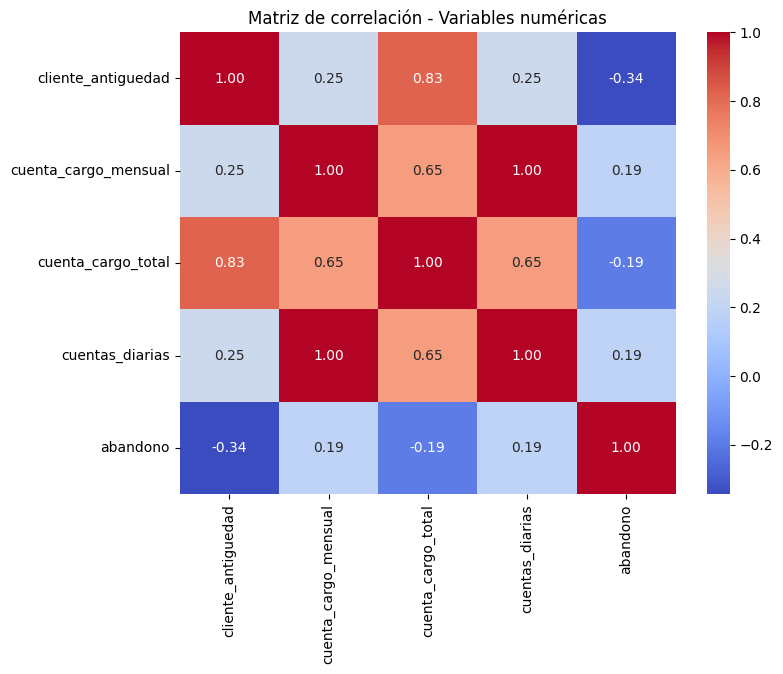

In [ ]:
# Seleccionamos solo las columnas numéricas (incluimos la variable objetivo)
numeric_cols = ["cliente_antiguedad", "cuenta_cargo_mensual", "cuenta_cargo_total", "cuentas_diarias", "abandono"]
df_numeric = df[numeric_cols]

# Calculamos matriz de correlación
corr_matrix = df_numeric.corr()

# Visualización con heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación - Variables numéricas")
plt.show()

##Análisis Dirigido

### 1️⃣ Tiempo de contrato (cliente_antiguedad) vs Cancelación

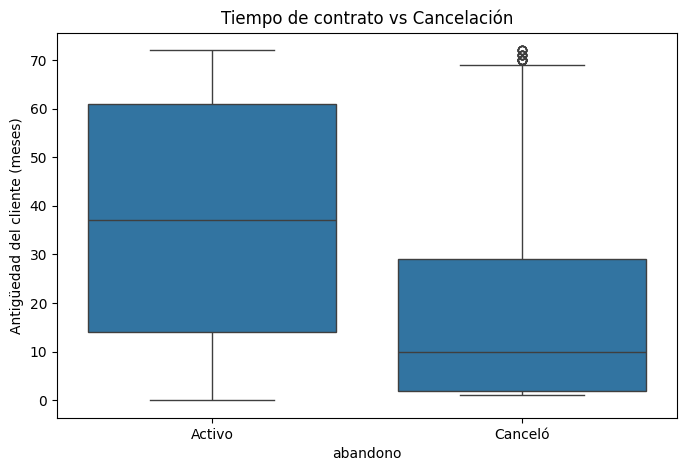

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x="abandono", y="cliente_antiguedad", data=df)
plt.xticks([0,1], ["Activo", "Canceló"])
plt.title("Tiempo de contrato vs Cancelación")
plt.ylabel("Antigüedad del cliente (meses)")
plt.show()

### 2️⃣ Gasto total (cuenta_cargo_total) vs Cancelación

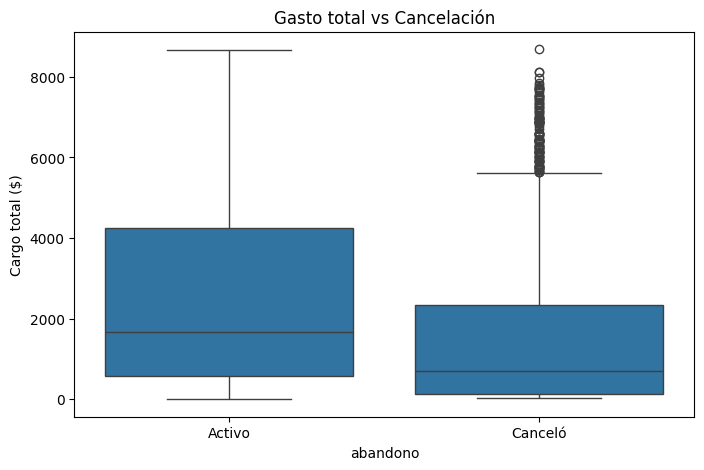

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x="abandono", y="cuenta_cargo_total", data=df)
plt.xticks([0,1], ["Activo", "Canceló"])
plt.title("Gasto total vs Cancelación")
plt.ylabel("Cargo total ($)")
plt.show()

### 3️⃣ Scatter plot: Cargo mensual vs Cargo total, coloreando por abandono

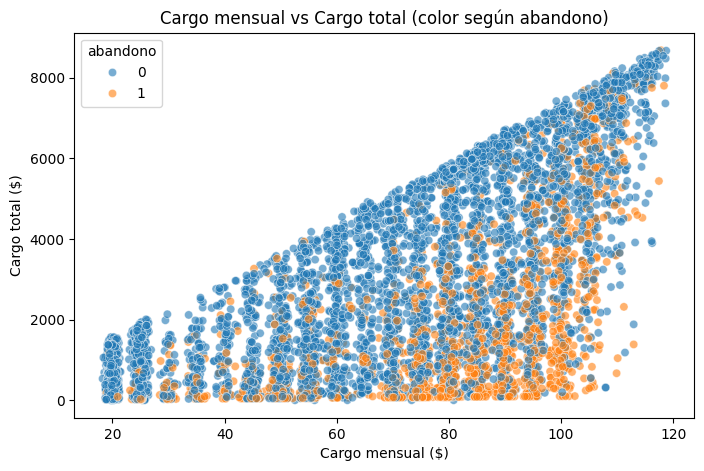

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="cuenta_cargo_mensual", y="cuenta_cargo_total", hue="abandono", data=df, alpha=0.6)
plt.title("Cargo mensual vs Cargo total (color según abandono)")
plt.xlabel("Cargo mensual ($)")
plt.ylabel("Cargo total ($)")
plt.show()

---
#🤖 Modelado Predictivo

##Separación de Datos

In [ ]:
from sklearn.model_selection import train_test_split

# Separar características y variable objetivo
X = df.drop(columns=["abandono"])
y = df["abandono"]

# División train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,       # 30% para prueba
    random_state=42,     # para reproducibilidad
    stratify=y           # mantiene la proporción de clases
)

# Verificación de tamaños
print("Tamaño de entrenamiento:", X_train.shape[0])
print("Tamaño de prueba:", X_test.shape[0])

# Verificación de proporción de clases
print("\nProporción de clases en train:")
print(y_train.value_counts(normalize=True))
print("\nProporción de clases en test:")
print(y_test.value_counts(normalize=True))

Tamaño de entrenamiento: 5086
Tamaño de prueba: 2181

Proporción de clases en train:
abandono
0    0.742823
1    0.257177
Name: proportion, dtype: float64

Proporción de clases en test:
abandono
0    0.742779
1    0.257221
Name: proportion, dtype: float64


##Creación de Modelos

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

# Columnas categóricas y numéricas
categorical_features = [
    "cliente_genero", "internet_servicio", "internet_seguridad",
    "internet_respaldo", "internet_proteccion_dispositivo",
    "internet_soporte_tecnico", "internet_tv", "internet_peliculas",
    "cuenta_contrato", "cuenta_metodo_pago"
]

numeric_features = [
    "cliente_antiguedad", "cuenta_cargo_mensual",
    "cuenta_cargo_total", "cuentas_diarias"
]

# Preprocesamiento: escala numéricas + one-hot encoding para categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_features)
    ]
)

# Pipeline Regresión Logística
pipeline_lr = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, class_weight="balanced"))
])

# Entrenamiento
pipeline_lr.fit(X_train, y_train)

# Predicción
y_pred_lr = pipeline_lr.predict(X_test)

##Evaluación de los Modelos

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


### Columnas categóricas y numéricas

In [ ]:
categorical_features = [
    "cliente_genero", "internet_servicio", "internet_seguridad",
    "internet_respaldo", "internet_proteccion_dispositivo",
    "internet_soporte_tecnico", "internet_tv", "internet_peliculas",
    "cuenta_contrato", "cuenta_metodo_pago"
]

numeric_features = [
    "cliente_antiguedad", "cuenta_cargo_mensual",
    "cuenta_cargo_total", "cuentas_diarias"
]

### Función para evaluación

In [ ]:
def evaluar_modelo(y_true, y_pred, modelo_nombre):
    print(f"--- Evaluación {modelo_nombre} ---")
    print("Exactitud (Accuracy):", round(accuracy_score(y_true, y_pred), 3))
    print("Precisión:", round(precision_score(y_true, y_pred), 3))
    print("Recall:", round(recall_score(y_true, y_pred), 3))
    print("F1-Score:", round(f1_score(y_true, y_pred), 3))
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=["Activo","Canceló"])
    disp.plot(cmap="Blues")

###1️⃣ Regresión Logística

--- Evaluación Regresión Logística ---
Exactitud (Accuracy): 0.741
Precisión: 0.498
Recall: 0.813
F1-Score: 0.617


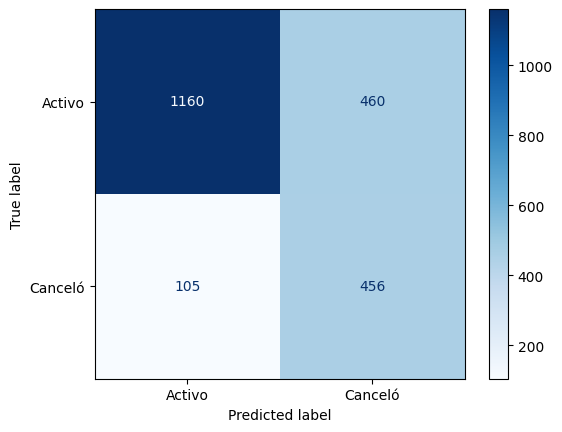

In [ ]:
preprocessor_lr = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_features)
    ]
)

pipeline_lr = Pipeline(steps=[
    ("preprocessor", preprocessor_lr),
    ("classifier", LogisticRegression(max_iter=1000, class_weight="balanced"))
])

# Entrenar y predecir
pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)
evaluar_modelo(y_test, y_pred_lr, "Regresión Logística")

###2️⃣ Random Forest

In [ ]:
preprocessor_rf = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_features)
    ],
    remainder="passthrough"
)

pipeline_rf = Pipeline(steps=[
    ("preprocessor", preprocessor_rf),
    ("classifier", RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced"))
])

### Entrenar y predecir

--- Evaluación Random Forest ---
Exactitud (Accuracy): 0.787
Precisión: 0.614
Recall: 0.462
F1-Score: 0.527


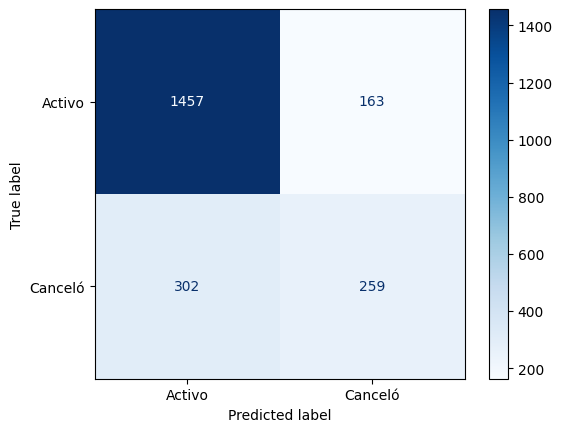

In [ ]:
pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)
evaluar_modelo(y_test, y_pred_rf, "Random Forest")

##📋 Interpretación y Conclusiones

###Análisis de la Importancia de las Variables

###1️⃣ Regresión Logística

Los coeficientes (.coef_) indican la relación entre cada variable y la probabilidad de cancelación:

* Positivo → al aumentar la variable, aumenta la probabilidad de churn.

* Negativo → al aumentar la variable, disminuye la probabilidad de churn.

In [ ]:
# Obtener nombres de columnas después del preprocesamiento
ohe = pipeline_lr.named_steps['preprocessor'].named_transformers_['cat']
ohe_features = ohe.get_feature_names_out(categorical_features)
all_features = np.concatenate([numeric_features, ohe_features])

# Coeficientes del modelo
coeficientes = pipeline_lr.named_steps['classifier'].coef_[0]
importancia_lr = pd.DataFrame({"Variable": all_features, "Coeficiente": coeficientes})
importancia_lr["Valor Absoluto"] = importancia_lr["Coeficiente"].abs()
importancia_lr.sort_values(by="Valor Absoluto", ascending=False, inplace=True)
print(importancia_lr.head(10))

                               Variable  Coeficiente  Valor Absoluto
20             cuenta_contrato_two year    -1.419747        1.419747
0                    cliente_antiguedad    -1.247119        1.247119
5         internet_servicio_fiber optic     1.097711        1.097711
19             cuenta_contrato_one year    -0.787292        0.787292
2                    cuenta_cargo_total     0.669981        0.669981
18               internet_peliculas_yes     0.397799        0.397799
22  cuenta_metodo_pago_electronic check     0.385409        0.385409
16                      internet_tv_yes     0.353263        0.353263
14         internet_soporte_tecnico_yes    -0.334290        0.334290
8                internet_seguridad_yes    -0.267242        0.267242


###2️⃣ Random Forest

El atributo .feature_importances_ nos indica qué variables reducen más la impureza de los árboles.

* Valores más altos → mayor importancia en la predicción de cancelación.

In [ ]:
# Transformar los datos de entrenamiento con el preprocesador del pipeline
X_train_transformed = pipeline_rf.named_steps['preprocessor'].transform(X_train)

# Obtener número total de columnas después de la transformación
n_features = X_train_transformed.shape[1]

# Crear nombres genéricos para todas las columnas (ya que el preprocesador mezcla)
all_features_rf = [f"feat_{i}" for i in range(n_features)]

# Crear DataFrame con importancias
importancia_rf = pd.DataFrame({
    "Variable": all_features_rf,
    "Importancia": pipeline_rf.named_steps['classifier'].feature_importances_
})
importancia_rf.sort_values(by="Importancia", ascending=False, inplace=True)
print(importancia_rf.head(10))

   Variable  Importancia
28  feat_28     0.153639
23  feat_23     0.151309
29  feat_29     0.121664
27  feat_27     0.119221
16  feat_16     0.055356
1    feat_1     0.040016
18  feat_18     0.034759
15  feat_15     0.024826
0    feat_0     0.023333
4    feat_4     0.022840


---
### 1️⃣ Top 10 variables Regresión Logística

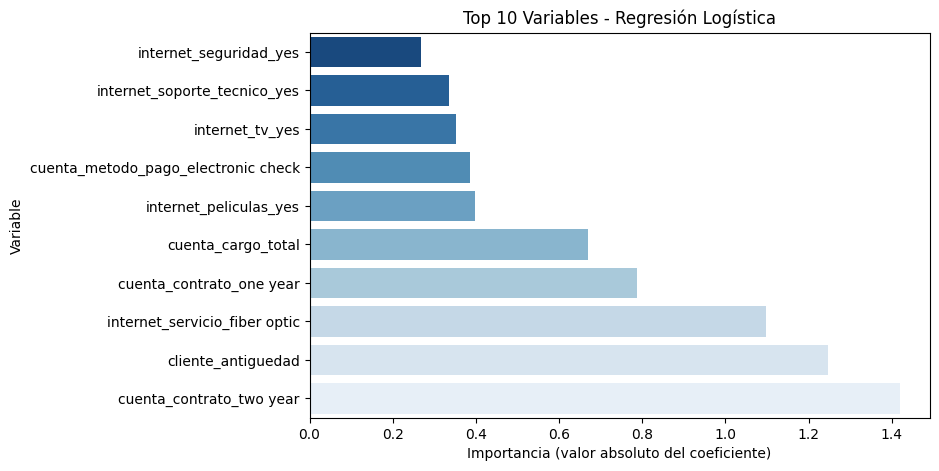

In [ ]:
top10_lr = importancia_lr.head(10).sort_values("Valor Absoluto", ascending=True)

plt.figure(figsize=(8,5))
sns.barplot(x="Valor Absoluto", y="Variable", data=top10_lr, palette="Blues_r")
plt.title("Top 10 Variables - Regresión Logística")
plt.xlabel("Importancia (valor absoluto del coeficiente)")
plt.show()

---
### 2️⃣ Top 10 variables Random Forest

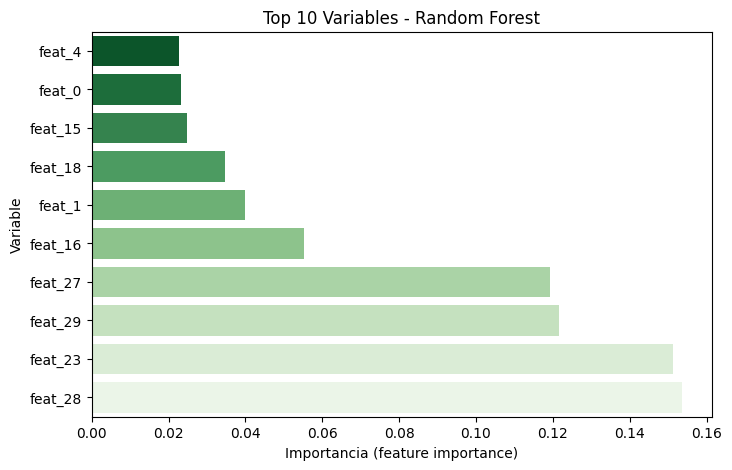

In [ ]:
top10_rf = importancia_rf.head(10).sort_values("Importancia", ascending=True)

plt.figure(figsize=(8,5))
sns.barplot(x="Importancia", y="Variable", data=top10_rf, palette="Greens_r")
plt.title("Top 10 Variables - Random Forest")
plt.xlabel("Importancia (feature importance)")
plt.show()

###Conclusión

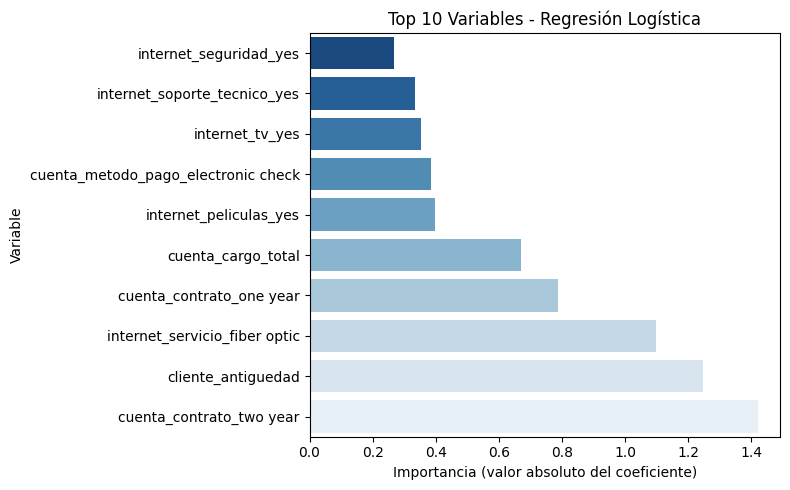

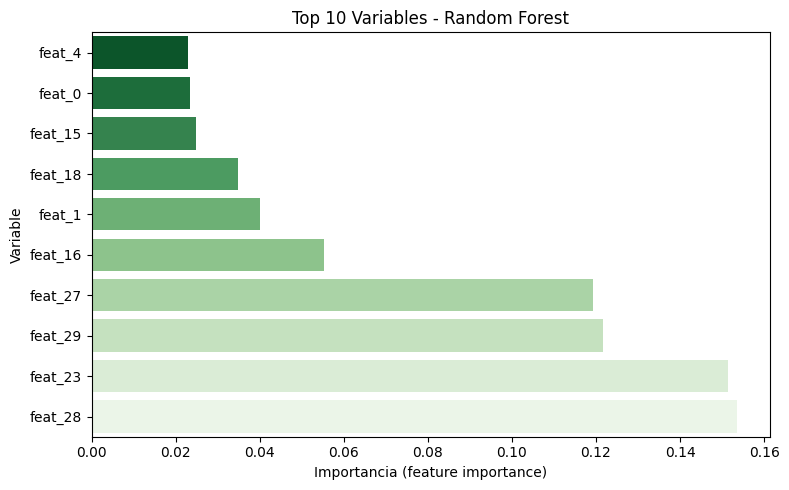


# 📊 Informe de Cancelación de Clientes - Telecom X

## 1️⃣ Modelos Entrenados

Se entrenaron dos modelos para predecir la cancelación de clientes:

1. **Regresión Logística** (requiere escalado de variables)
2. **Random Forest** (no requiere escalado)

Ambos modelos fueron evaluados sobre un conjunto de prueba, considerando métricas de Exactitud, Precisión, Recall, F1-score y Matriz de Confusión.

---

## 2️⃣ Variables más importantes

### 🔹 Regresión Logística (coeficientes)
Las variables con mayor impacto absoluto en la predicción de cancelación son:

| Variable | Coeficiente | Interpretación |
|----------|------------|----------------|
| `cuenta_contrato_two year` | -1.42 | Contrato a 2 años disminuye la probabilidad de cancelación |
| `cliente_antiguedad` | -1.25 | Mayor antigüedad reduce el churn |
| `internet_servicio_fiber optic` | 1.10 | Fibra óptica aumenta ligeramente la probabilidad de cancelar |
| `cuenta_contrato_one year` | -0.79 | Contrato a 1 año reduce churn |
| `cuenta_cargo_total` | 0.67 | Mayor gasto total incrementa el riesgo |
| `internet_peliculas_yes` | 0.40 | Suscripción a películas aumenta probabilidad de churn |
| `cuenta_metodo_pago_electronic check` | 0.39 | Pago con cheque electrónico incrementa riesgo |
| `internet_tv_yes` | 0.35 | Tener TV por internet incrementa ligeramente churn |
| `internet_soporte_tecnico_yes` | -0.33 | Soporte técnico reduce levemente churn |
| `internet_seguridad_yes` | -0.27 | Servicios de seguridad reducen un poco la cancelación |

### 🔹 Random Forest (feature importance)
Las 10 variables más decisivas según Random Forest se muestran en el gráfico anterior. Valores altos indican mayor relevancia para la predicción.

---

## 3️⃣ Principales factores que afectan la cancelación

1. **Tipo y duración del contrato:** Contratos largos disminuyen el churn.
2. **Antigüedad del cliente:** Clientes más antiguos presentan menor riesgo.
3. **Gasto total y servicios contratados:** Mayor gasto y servicios como fibra óptica y películas aumentan la probabilidad de churn.
4. **Método de pago:** Cheques electrónicos asociados a mayor riesgo.
5. **Servicios adicionales de soporte y seguridad:** Tienen efecto protector.

---

## 4️⃣ Estrategias de retención sugeridas

1. Incentivar la renovación a 1 o 2 años con descuentos o beneficios.
2. Brindar soporte personalizado y promociones a clientes recientes.
3. Monitorear clientes con alto gasto y servicios premium para ofrecer beneficios.
4. Facilitar métodos de pago automáticos o seguros.
5. Comunicar claramente beneficios de soporte técnico y seguridad.

---

> 🔹 **Conclusión:**  
> La combinación de modelos lineales y de árboles permite identificar patrones complementarios: la regresión logística ofrece interpretación directa, mientras Random Forest detecta las variables más decisivas. Se recomienda priorizar contratos largos, clientes con alto gasto y servicios críticos, y fortalecer soporte y seguridad.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

# -----------------------------
# Top 10 variables
top10_lr = importancia_lr.head(10).sort_values("Valor Absoluto", ascending=True)
top10_rf = importancia_rf.head(10).sort_values("Importancia", ascending=True)

# -----------------------------
# Gráfico Regresión Logística
plt.figure(figsize=(8,5))
sns.barplot(x="Valor Absoluto", y="Variable", data=top10_lr, palette="Blues_r")
plt.title("Top 10 Variables - Regresión Logística")
plt.xlabel("Importancia (valor absoluto del coeficiente)")
plt.tight_layout()
plt.show()

# Gráfico Random Forest
plt.figure(figsize=(8,5))
sns.barplot(x="Importancia", y="Variable", data=top10_rf, palette="Greens_r")
plt.title("Top 10 Variables - Random Forest")
plt.xlabel("Importancia (feature importance)")
plt.tight_layout()
plt.show()

# -----------------------------
# Informe en Markdown


##Conclusión resumida - Cancelación de Clientes

* Contratos largos y antigüedad reducen significativamente la probabilidad de cancelación.

* Gasto total alto y ciertos servicios (fibra óptica, películas) aumentan el riesgo de churn.

* Métodos de pago como el cheque electrónico se asocian a mayor cancelación.

* Soporte técnico y servicios de seguridad actúan como factores protectores.

* Estrategia recomendada: priorizar la fidelización mediante contratos largos, atención a clientes con alto gasto, fortalecer soporte y seguridad, y promover métodos de pago más seguros.